In [12]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

导入鸢尾花数据集iris  

四个属性：
- Sepal.Length（花萼长度），单位是cm;
- Sepal.Width（花萼宽度），单位是cm;
- Petal.Length（花瓣长度），单位是cm;
- Petal.Width（花瓣宽度），单位是cm;  

三个种类：
- Iris Setosa（山鸢尾）；
- Iris Versicolour（杂色鸢尾）；
- Iris Virginica（维吉尼亚鸢尾）。

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
iris.keys()  # 数据集是字典格式的数据，查看字典关键词

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
iris.target_names  # 查看数据的类别标签

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [5]:
iris.feature_names  # 查看数据的特征名称

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
X = X[y != 0, :2]  # 只选取两个种类，和前2个特征数据
y = y[y != 0]

数据集打乱，随机排序，然后换分训练集和测试集

In [8]:
n_sample = len(X)
np.random.seed(0)
# permutation不直接在原来的数组上进行操作，而是返回一个新的打乱顺序的数组，并不改变原来的数组
order = np.random.permutation(n_sample)
X = X[order]
y = y[order]
X_train = X[:int(0.9 * n_sample)]
y_train = y[:int(0.9 * n_sample)]
X_test = X[int(0.9 * n_sample):]
y_test = y[int(0.9 * n_sample):]

拟合linear，rbf，poly三种支持向量机模型

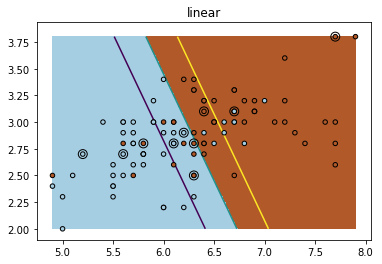

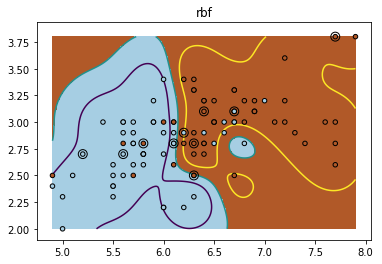

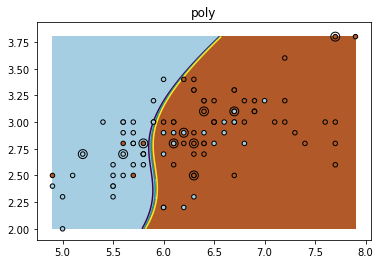

In [14]:
for kernel in ('linear', 'rbf', 'poly'):
    # 根据训练集拟合模型
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)
    # 绘制图形
    plt.figure()
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, 
                cmap=plt.cm.Paired, edgecolor='k',
                s=20)
    plt.scatter(X_test[:, 0], X_test[:, 1], 
                s=80, facecolors='none', zorder=10, edgecolors='k')
    plt.axis('tight')
    X_min = X[:, 0].min()
    X_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    XX, YY = np.mgrid[X_min : X_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, color=['k', 'k', 'k'],
                linestyle=['--', '-', '--'], levels=[-0.5, 0, 0.5])
    plt.title(kernel)
    plt.show()